In [1]:
import torch
import numpy as np
%matplotlib notebook

In [2]:
# generate points to represent dataset
x = np.random.normal(2,1,1000)
x_t = torch.tensor(x,dtype=torch.float)

# Define the parameters
mean = torch.tensor([8.],requires_grad = True)
var = torch.tensor([6.],requires_grad = True)


e = torch.tensor([2.137],dtype=torch.float)

In [3]:
points=[]
for i in range(10000):
#     define liklihood function
    like = -0.5*torch.log(2*3.14159*var) - (((x_t-mean).pow(2))/(2*var))
    likely = like.sum()
    
#     Differentiate and backpropagate to find gradients
    likely.backward()
#     print (theta.grad)
#     if i%1000:
#         print (mean.data,var.data,mean.grad.data,var.grad.data)
#         print (mean.grad+var.grad)
    s1=float(mean.data)
    s2=float(var.data)
    points.append([s1,s2])
    
    if abs((mean.grad+var.grad).data) <0.0001: # stop condition
        break
        
        
#     Gradient Ascent
    with torch.no_grad():
        mean += 0.001*mean.grad
        mean.grad.zero_()
    with torch.no_grad():
        var += 0.001*var.grad
        var.grad.zero_()

In [4]:
mean.data,var.data #mean and variance obtained from MLE

(tensor([1.9759]), tensor([1.0398]))

In [5]:
x.mean(),x.var() #mean and variance obtained from definitions of them

(1.9758941573654052, 1.0397503540418938)

In [6]:
# points

<IPython.core.display.Javascript object>


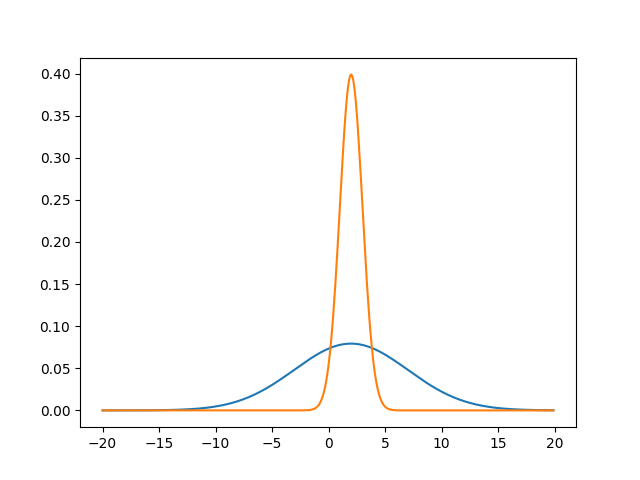

In [7]:
"""
Animated plot
"""
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(-20, 20, 0.1)
line, = ax.plot(x, norm(loc=points[0][0], scale=points[0][1]).pdf(x))
line1, = ax.plot(x, norm(loc=2, scale=1).pdf(x))

def animate(i):
#     line1.set_ydata(norm(loc=2, scale=1).pdf(x))  # update the data
    line.set_ydata(norm(loc=points[i][0], scale=points[i][1]).pdf(x))  # update the data
    return line,


# Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(norm(loc=points[0][0], scale=points[0][1]).pdf(x))
#     line.set_ydata(np.ma.array(x, mask=True))
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, len(points)), init_func=init,
                              interval=100, blit=True)

plt.show()